# Comparison of U.S. newspapers' longitudinal use of *risk words*

### [Daniel McDonald](mailto:mcdonaldd@unimelb.edu.au?Subject=IPython%20NYT%20risk%20project), [Jens Zinn](mailto:jzinn@unimelb.edu.au?Subject=IPython%20NYT%20risk%20project), University of Melbourne

> In this notebook, we build on a preliminary investigation of risk words in *The New York Times*, looking at five additional mainstream U.S. newspapers. See our [GitHub repository](https://www.github.com/interrogator/risk), [IPython Notebook](https://github.com/interrogator/risk/blob/master/risk.ipynb), or [project report](https://raw.githubusercontent.com/interrogator/risk/master/risk_report.pdf) for more information. The theoretical underpinnings of our work, for example, are outlined in detail in the report.

> This Notebook assumes its reader has basic familiarity with **Python** and **key linguistic concepts**, such as word class, syntax, and lemma.

## Introduction: sociology, linguistics, code

Sociologists such as Ulrich Beck and Anthony Giddens have characterised late modernity as *a risk society*, where risk plays an increasingly central role in both institutional structures and everyday life.

Functional linguists are interested in mapping the ways in which words and wordings come together to both construct and represent particular discourses and ideologies. Over the past fifty years, linguists working within functional traditions have mapped out in detail how language is employed by its users as a resource for negotiating interpersonal relationships and for representing doings and happenings in the world, or in consciousness.

Assuming that an increasing salience of *risk* in society will at least partly be reflected in the ways in which risk is discussed, it should therefore be possible to use real-world communication about risk to empirically examine sociological claims.

A number of technological developments make it possible to investigate risk semantics on a large scale:

1. Large, well-organised digital collections of news articles
2. Tools for annotating digital text with linguistic information, such as word classes and grammatical structure
3. Programming languages, libraries and modules that can extract useful information from these annotations

That said, the use of corpus linguistics for discourse analysis is a relatively recent development, with available tools and methods still somewhat behind the state of the art resources available in computaional linguistics, natural language processing, etc.

Accordingly, we use [*corpkit*](https://www.github.com/interrogator/corpkit), a purpose-built Python module for interrogating parsed corpora. The tool is also available as a graphical application, documented and downloadable [here](http://interrogator.github.io/corpkit/). Though our investigation could be performed using the graphical interface, we have instead opted for the command-line tools, which offer more flexibility, especially when working with multiple corpora simultaneously.

## Aim of the investigation

Our main interest was in determining **whether findings from our investigation of the NYT could be generalised to other major U.S. newspapers.**

This investigation makes it possible to describe, and hopefully explain, how risk words have behaved longitudinally in mainstream U.S. newspapers. Later work will connect these findings more explicitly to sociological claims.

## Data

Based on readership, location and digital availability, we selected the following six newspapers.

    1. The New York Times
    2. The Wall Street Journal
    3. The Tampa Bay Times
    4. USA Today
    5. Chicago Tribune
    6. The Washington Post

## Corpus building

To do this, we used ProQuest to grab any articles in these newspapers from 1987-2015 that contained a risk word (defined by regular expression as `(?i)\brisk` ). This left us with over 500,000 articles!

Paragraphs with risk words were extracted and parsed using *Stanford CoreNLP*. Given the computationally intensive nature of parsing, we relied on high-performance computing resources from the University of Melbourne to run an *embarrassingly parallel* parsing script.

The result of this process was six folders/corpora (one for each newspaper), which each containing annual subcorpora, containing CoreNLP `XML` annotation of risk paragraphs.

## Analytical approach

Once we had the data annotated, the challenges were to:

1. Search the data to find meaningful information about the way risk words behave
2. Turn raw findings into useful visualisations, descriptions and explanations

Computationally, we used *corpkit* to search the constituency and dependency parses for lexicogrammatical and discourse-semantic sites of change. Theoretically, we used concepts from *systemic functional linguistics*, which articulates the ways in which levels of linguistic abstraction are related, and the ways in which different kinds of meaning are realised in grammar and wording.

## Key limitations

There are a number of fairly serious limitations that should be acknowledged upfront.

First, we are looking only at mainstream U.S. newspaper articles. Our findings do not reflect society generally, in the USA or otherwise: risk words likely behave very differently in different text types.

Computationally, we must acknowledge that parser accuracy may be an issue.

In terms of linguistic theory, relevant concepts from systemic functional linguistics cannot be operationalised fully, given differences between the systemic-functional grammar and the grammars with which texts were annotated.

Finally, **we're not really investigating the concept of risk, but only risk words**. Risk as a concept can be construed without the word being present (*"They had to decide which was safer ... "*). We chose to focus only on risk words because there is less room for ambiguity about whether or not a risk is being construed, and to reduce our dataset to a manageable size. To parse all text from six newspapers over a 30 year period would perhaps be the largest amount of data ever parsed for a single academic project, requiring massive dedicated resources.

## Getting started

First, we need to import the corpkit module, as well as *pandas*, which can help us manipulate results:

In [1]:
# show plots in this notebook
%matplotlib inline

# import corpkit
from corpkit import interrogator, editor, plotter, conc

# some wordlists we'll use later
from dictionaries.process_types import processes
from dictionaries.wordlists import wordlists
from dictionaries.roles import roles

# for editing/combining results:
import pandas as pd

We'll also need to set paths to our corpora:

In [2]:
nyt = 'data/NYT'
wsj = 'data/WSJ'
wap = 'data/WAP'
cht = 'data/CHT'
ust = 'data/UST'
tbt = 'data/TBT'
all_corpora = [nyt, wsj, wap, cht, ust, tbt]
all_corpora = ['data/nyt/fir', 'data/nyt/sec', 'data/nyt/thi', 'data/nyt/fou',]

If you already have data saved, you might want to load it all into memory now:

In [4]:
from corpkit import load_all_results
r = load_all_results()

15:29:01: 6_allwords.p loaded as 6_allwords.
15:29:01: 6_govrole loaded as 6_govrole.
15:29:01: 6_noun_lemmata loaded as 6_noun_lemmata.
15:29:01: 6_noun_riskers loaded as 6_noun_riskers.
15:29:01: 6_riskclasses loaded as 6_riskclasses.
15:29:01: 6_riskfunct loaded as 6_riskfunct.
15:29:01: 6_risktags loaded as 6_risktags.
15:29:01: 6_riskwords loaded as 6_riskwords.
15:29:01: adj_modifiers.p loaded as adj_modifiers.
15:29:01: adj_riskwords.p loaded as adj_riskwords.
15:29:02: all_govs.p loaded as all_govs.
15:29:03: all_participants_trees.p loaded as all_participants_trees.
15:29:03: all_pos.p loaded as all_pos.
15:29:03: allwords.p loaded as allwords.
15:29:03: any_word_distance.p loaded as any_word_distance.
15:29:03: at_risk_things.p loaded as at_risk_things.
15:29:03: baseline.p loaded as baseline.
15:29:04: coll_govs_of_riskwords.p loaded as coll_govs_of_riskwords.
15:29:05: coll_govs_with_pos.p loaded as coll_govs_with_pos.
15:29:07: collapsed_deps.p loaded as collapsed_deps.
15

And finally, let's set our very simple regular expression for *risk words*:

In [5]:
riskword = r'(?i)\brisk'

Ready? OK, let's interrogate.

## Basic training

*corpkit* is essentially four functions and some wordlists. Here are the functions and their main arguments:

> `interrogator(corpus, searchtype, query, **optional_args)` searches corpora and tabulates raw frequency results

> `editor(result_to_edit, operation, denominator, **optional_args)` edits these results, by merging, skipping, renaming, sorting, keywording, summing, etc.

> `plotter(title, results_to_plot, **_optional_args)` allows us to visualise `interrogator()` and `editor()` results

> `conc(subcorpus, searchtype, query, **optional_args)` concordances corpora. It can help show results in more detail.

The wordlists can be accessed like this:

In [6]:
print processes.relational

[u"'d", u"'m", u"'re", u"'s", u"'ve", u'am', u'appear', u'appeared', u'appearing', u'appears', u'are', u'be', u'became', u'become', u'becomes', u'becoming', u'been', u'being', u'feel', u'feeling', u'feels', u'felt', u'had', u'has', u'have', u'having', u'is', u'look', u'looked', u'looking', u'looks', u'seem', u'seemed', u'seeming', u'seems', u'smell', u'smelled', u'smelling', u'smells', u'smelt', u'sound', u'sounded', u'sounding', u'sounds', u'was', u'were']


In [7]:
print wordlists.determiners

[u'all', u'anotha', u'another', u'any', u'any-and-all', u'atta', u'both', u'certain', u'couple', u'dat', u'dem', u'dis', u'each', u'either', u'enough', u'enuf', u'enuff', u'every', u'few', u'fewer', u'fewest', u'her', u'hes', u'his', u'its', u'last', u'least', u'many', u'more', u'most', u'much', u'muchee', u'my', u'neither', u'nil', u'no', u'none', u'other', u'our', u'overmuch', u'owne', u'plenty', u'quodque', u'several', u'some', u'such', u'sufficient', u'that', u'their', u'them', u'these', u'they', u'thilk', u'thine', u'this', u'those', u'thy', u'umpteen', u'us', u'various', u'wat', u'we', u'what', u'whatever', u'which', u'whichever', u'yonder', u'you', u'your']


In [8]:
print roles.process

['ccomp', 'cop', 'prt', 'root']


Wordlists can be used as queries, or as criteria to match during editing.

## Getting started

So, the first thing we'll need to do is get some basic stuff:

1. The number of words in each corpus
2. The number of risk words in each corpus
3. The part of speech tags for risk words in each corpus
4. The word class of risk words

The basic syntax for using `interrogator()` is to provide:

1. a path to a corpus, or a list of paths
2. a search type (there are a lot!)
3. a search query
4. optional arguments, for saving results, lemmatising, etc.

When `interrogator()` gets a single string as its first argument, it treats the string as a path to a corpus, and outputs an object with `query`, `results` and `totals` attributes. When it receives a list of strings, it understands that there are multiple corpora to search. Using parallel processing, it searches each one, and returns a `dict` object with paths as keys and named tuple objects as values.

Note that our risk regular expression needs to be inside `"/ /"` boundaries, because here we're using [Tregex](http://nlp.stanford.edu/manning/courses/ling289/Tregex.html) syntax.


In [4]:
# returns a named tuple with results, totals and query:
allwords = interrogator(all_corpora, 'count', 'any', quicksave = '6_allwords')

# returns a dict with paths as keys and named tuples as values:
riskwords = interrogator(all_corpora, 'words', '/%s/' % riskword, quicksave = '6_riskwords')
riskclasses = interrogator(all_corpora, 'pos', '/%s/' % riskword, quicksave = '6_riskclasses')

# the lemmatise option turns words to their stem 
# form, but turns pos tags to their major word class
risktags = interrogator(all_corpora, 'pos', '/%s/' % riskword, 
                        lemmatise = True, quicksave = '6_risktags')


14:23:36: Beginning 4 parallel corpus interrogations:
              data/nyt/fir
              data/nyt/fou
              data/nyt/sec
              data/nyt/thi

          Query: 'any'
          Interrogating corpus ... 

14:23:48: [***************************100%***************************]  

14:23:50: Finished! 4 unique results, 77843 total.

14:23:50: Data saved: saved_interrogations/6_allwords.p


14:23:50: Beginning 4 parallel corpus interrogations:
              data/nyt/fir
              data/nyt/fou
              data/nyt/sec
              data/nyt/thi

          Query: '/(?i)\brisk/'
          Interrogating corpus ... 

14:24:01: [***************************100%***************************]  

14:24:02: Finished! Output is a dictionary with keys:

         'fir'
         'fou'
         'sec'
         'thi'


14:24:02: Data saved: saved_interrogations/6_riskwords/fir.p


14:24:02: Data saved: saved_interrogations/6_riskwords/fou.p


14:24:02: Data saved: saved_interrogations/

In [5]:
print allwords.results

       fou   sec   fir   thi
1989   257   404   404   404
2005  9850  9850  9479  9850
2006  9633  9383  9633  8696


In [5]:
print riskwords['fir'].results

      risk  risks  risky  risking   ...     risk-informed  risk-abhorrent  high-risk  at-risk
1989     7      1      1        0   ...                 0               0          0        0
2005   108     56      5        5   ...                 1               1          1        1
2006   110     56      5        5   ...                 1               1          1        1

[3 rows x 11 columns]


## Using dependencies

We can also look at risk words by dependency role:

In [6]:
riskfunct = interrogator(all_corpora, 'function', riskword, quicksave = '6_riskfunct')


14:25:05: Beginning 4 parallel corpus interrogations:
              data/nyt/fir
              data/nyt/fou
              data/nyt/sec
              data/nyt/thi

          Query: '(?i)\brisk'
          Interrogating corpus ... 

14:26:12: [***************************99% (344/345)***************** ]  

14:26:12: Finished! Output is a dictionary with keys:

         'fir'
         'fou'
         'sec'
         'thi'


14:26:12: Data saved: saved_interrogations/6_riskfunct/fir.p


14:26:12: Data saved: saved_interrogations/6_riskfunct/fou.p


14:26:12: Data saved: saved_interrogations/6_riskfunct/sec.p


14:26:12: Data saved: saved_interrogations/6_riskfunct/thi.p



The code below converts the functions to systemic labels using `editor()`. `editor()` can receive either a results attribute as its main input, or a `dict` object outputted by `interrogator()`. In the case of the latter, it outputs another `dict` object.

In [8]:
print roles._asdict().keys()

['actor', 'adjunct', 'auxiliary', 'circumstance', 'classifier', 'complement', 'deictic', 'epithet', 'event', 'existential', 'goal', 'modal', 'numerative', 'participant', 'participant1', 'participant2', 'polarity', 'predicator', 'process', 'qualifier', 'subject', 'textual', 'thing']


In [12]:
merges = {'Participant': roles.participant,
          'Process': roles.process,
          'Modifier': roles.circumstance + roles.epithet + roles.classifier}

sysfunc = editor(riskfunct, '%', 'self', merge_entries = merges, just_entries = merges.keys())


***Processing results***

Merging 4 entries as "Modifier":
    advcl
    pobj
    amod
    nn

Merging 3 entries as "Participant":
    dobj
    nsubj
    nsubjpass

Merging 2 entries as "Process":
    ccomp
    root

Keeping 3 entries:
    Process
    Modifier
    Participant

***Done!***


14:35:16: Finished! Output is a dictionary with keys:

         'fir'
         'fou'
         'sec'
         'thi'



We can then plot a single newspaper:

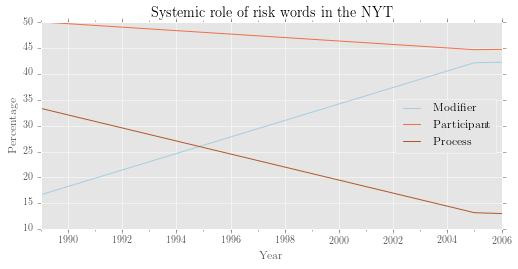

In [14]:
plotter('Systemic role of risk words in the NYT', sysfunc['wsj'].results)

Or, we can look at the behaviour of a given role in every paper. To do this, let's write a simple function that extracts an entry from each result and concatenates the output:

In [18]:
def entry_across_corpora(result_dict, entry_name):
    import pandas as pd
    res = []
    # for each corpus name and data
    for k, v in sorted(result_dict.items()):
        # grab the process result for each paper
        column = v.results[entry_name]
        # rename it to the corpus name
        column.name = k
        # append to a list
        res.append(column)
    # concatenate and return
    return pd.concat(res, axis = 1)

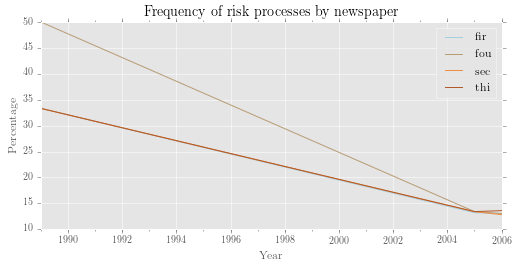

In [21]:
proc = entry_across_corpora(sysfunc, 'Process')
plotter('Frequency of risk processes by newspaper', proc, legend = 'or')

Neat, eh? A problem with this kind of analysis of risk as process, however, is that it misses risk processes where risk is a noun, not a verb:
    
    1. They took a risk
    2. They ran a risk
    3. It posed a risk
    4. They put it at risk
 
One of our search options, 'governor', can distinguish between these accurately. The query below shows us the function of risk words, and the lemma form of their governor.

In [22]:
govrole = interrogator(all_corpora, 'g', riskword, lemmatise = True, 
                       dep_type = 'collapsed-ccprocessed-dependencies', quicksave = '6_govrole')


14:45:01: Beginning 4 parallel corpus interrogations:
              data/nyt/fir
              data/nyt/fou
              data/nyt/sec
              data/nyt/thi

          Query: '(?i)\brisk'
          Interrogating corpus ... 

14:46:22: [***************************99% (344/345)***************** ]  

14:46:22: Finished! Output is a dictionary with keys:

         'fir'
         'fou'
         'sec'
         'thi'


14:46:22: Data saved: saved_interrogations/6_govrole/fir.p


14:46:22: Data saved: saved_interrogations/6_govrole/fou.p


14:46:22: Data saved: saved_interrogations/6_govrole/sec.p


14:46:22: Data saved: saved_interrogations/6_govrole/thi.p



In [23]:
print govrole['sec'].results

      root:root  dobj:take  nsubj:be  dobj:pose    ...      prep_at:place  advcl:fuel  prep_without:pursue  nsubj:low
1989          1          0         1          0    ...                  0           0                    1          1
2005         14         13        13          8    ...                  1           1                    0          0
2006         13         13        10          8    ...                  1           1                    0          0

[3 rows x 125 columns]


In the result above:

> `root:root` corresponds to risk as predicator.

> `dobj:run/take/pose` are *run risk*, *take risk* and *pose risk*. Note that the risk word here is identified as a direct object, while in systemic functional grammar it would be a *process-range configuration*.

> `prep_at:put` captures *to put at risk*. This only works when using the collapsed dependency grammar.

The first thing we can use this result for is to fix up our earlier count of risk by functional role. It's tricky, but shows the power of `editor()` and `pandas`:

In [32]:
# make a copy, to be safe
from copy import deepcopy
syscopy = deepcopy(sysfunc)

# for each corpus
for k, v in syscopy.items():
    # calculate number to add to process count
    add_to_proc = govrole[k].results[['dobj:run', 'dobj:take', 'dobj:pose', 'prep_at:put']].sum(axis = 1)
    # calculate number to subtract from participant count
    subtract_from_part = govrole[k].results[['dobj:run', 'dobj:take', 'dobj:pose']].sum(axis = 1)
    # calculate number to subtract from modifier count
    subtract_from_mod = govrole[k].results['prep_at:put']
    
    # do these calculations
    v.results['Process'] = v.results['Process'] + add_to_proc
    v.results['Participant'] = v.results['Participant'] - subtract_from_part
    v.results['Modifier'] = v.results['Modifier'] - subtract_from_mod

In [33]:
print syscopy['fir'].results

      Modifier  Participant  Process
1989     16.67        50.00    33.33
2005     36.14        18.65    45.21
2006     36.24        18.72    45.04


Now, let's plot more accurately, by role, and then by paper:

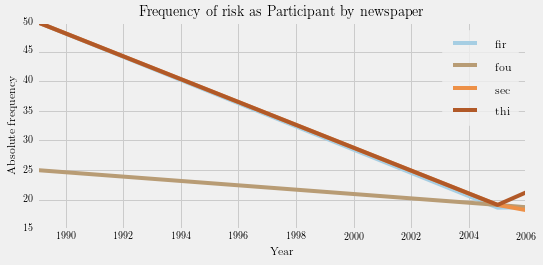

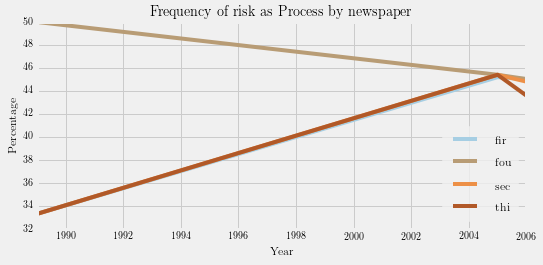

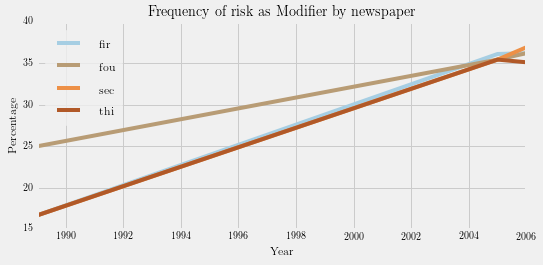

In [34]:
for role in ['Participant', 'Process', 'Modifier']:
    df = entry_across_corpora(syscopy, role)
    plotter('Frequency of risk as %s by newspaper' % role, df, style = 'fivethirtyeight')

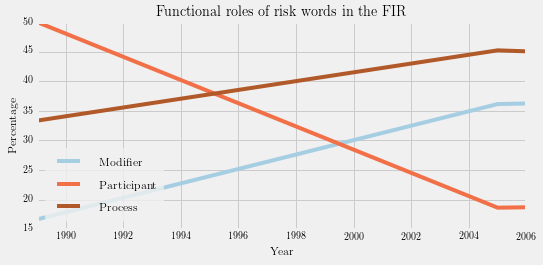

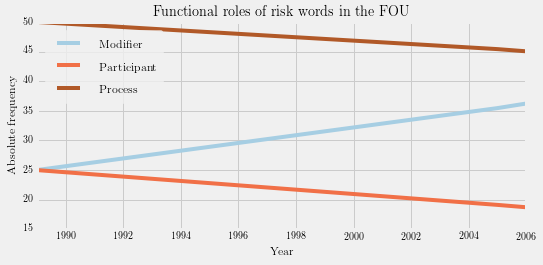

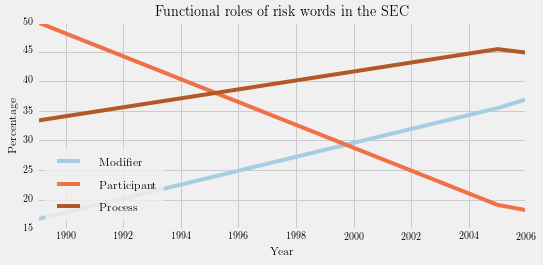

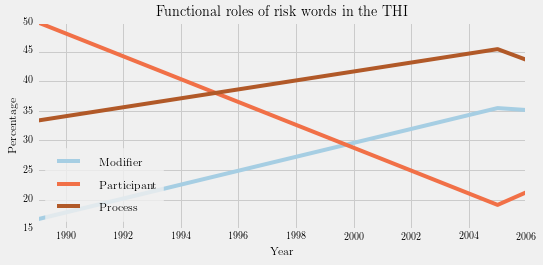

In [35]:
for name, data in syscopy.items():
    plotter('Functional roles of risk words in the %s' % name.upper(), data.results, style = 'fivethirtyeight')

## Risk processes

The next thing we can do with our `govrole` interrogation is to plot the frequencies of the five identified risk processes. To do this, we can rename the combination of role and governor to something more readable, and then remove all other entries:

In [47]:
renames = {'to risk': 'root:root',
           'to run risk':'dobj:run',
           'to take risk': 'dobj:take',
           'to pose risk': 'dobj:pose',
           'to put at risk': 'prep_at:put'}

risk_processes = editor(govrole, replace_names = renames, 
                               just_entries = renames.keys(), sort_by = 'total')


***Processing results***

Replacing "root:root" with "to risk" ...

Replacing "prep_at:put" with "to put at risk" ...

Replacing "dobj:take" with "to take risk" ...

Replacing "dobj:run" with "to run risk" ...

Replacing "dobj:pose" with "to pose risk" ...

Merging duplicate entries ... 

Keeping 5 entries:
    to risk
    to put at risk
    to take risk
    to run risk
    to pose risk

***Done!***


14:52:27: Finished! Output is a dictionary with keys:

         'fir'
         'fou'
         'sec'
         'thi'



Let's take a look at what we have:

In [48]:
print risk_processes['thi'].results

      to risk  to take risk  to pose risk  to put at risk  to run risk
1989        1             0             0               0            0
2005       14            13             8               6            5
2006       13            13             8               5            4


Displaying all this information properly is tricky. First, we can try collapsing distinctions between subcorpora---though this means that we can't observe longitudinal change:

In [55]:
out = []
for k, v in risk_processes.items():
    data = v.results.sum(axis = 0)
    data.name = k
    out.append(data)
collapsed_years = pd.concat(out, axis = 1)
print collapsed_years

                fir  fou  sec  thi
to risk          29   29   28   28
to take risk     26   26   26   26
to pose risk     16   16   16   16
to put at risk   12   12   12   11
to run risk      10   10   10    9


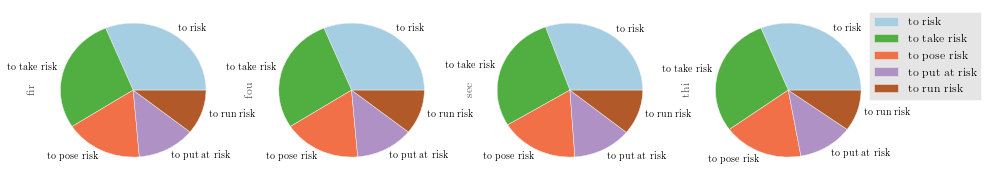

In [58]:
plotter('Risk processes', collapsed_years, kind = 'pie', subplots = True, figsize = (15, 3))

Or, we can collapse the distinction between newspapers. Perhaps we could make another function for this:

In [88]:
def collapsed(interrogation):
    import pandas as pd
    df = interrogation.values()[0].results
    for i in interrogation.values()[1:]:
        df = df.add(i.results)
    return df

      to risk  to take risk  to pose risk  to put at risk  to run risk
1989        4             0             0               0            0
2005       56            52            32              24           20
2006       54            52            32              23           19


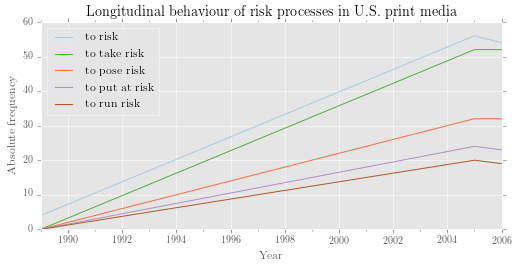

In [90]:
print collapsed(risk_processes)
plotter('Longitudinal behaviour of risk processes in U.S. print media', collapsed(risk_processes))

We also found growth in the use of risk as a nominal pre-head modifier (*risk factor*, *risk brokerage*, etc.). We can use the same interrogation to find out what risk modifies in this way:

In [96]:
# this is a bit of a hack: delete nnmod: from names, then remove 
# any entry with a ':' in it

nom_mod = editor(govrole, replace_names = 'nnmod:', skip_entries = ':')



***Processing results***

Replacing "dobj:" with "" ...

Merging duplicate entries ... 

Skipping 101 entries:
    root:root
    nsubj:be
    prep_at:be
    prep_at:put
    prep_at:help
    ccomp:say
    xcomp:willing
    prep_without:be
    conj_and:risk
    conj_and:go
... and 91 more ... 

***Done!***


15:11:57: Finished! Output is a dictionary with keys:

         'fir'
         'fou'
         'sec'
         'thi'

      take  pose  run  carry   ...     diminish  do  calculate  suggest
1989     0     0    0      0   ...            0   0          0        0
2005    13     8    5      3   ...            1   1          1        1
2006    13     8    5      3   ...            1   1          1        1

[3 rows x 24 columns]


In [93]:
print nom_mod['fir'].results

Empty DataFrame
Columns: []
Index: [1989, 2005, 2006]


In [ ]:
for k, v in nom_mod.items():
    plotter('Nouns modified by risk as classifier (%s)' % k.upper(), v.results)

It's interesting to find out which words are increasing and decreasing the most over time:

In [ ]:
nom_mod_inc = editor(govrole.results, replace_names = 'nnmod:', skip_entries = ':', sort_by = 'increase')
nom_mod_dec = editor(govrole.results, replace_names = 'nnmod:', skip_entries = ':', sort_by = 'decrease')


plotter('Nouns modified by risk as classifier, increasing', collapsed(nom_mod_inc))
plotter('Nouns modified by risk as classifier, decreasing', collapsed(nom_mod_dec.results))

One thing we noticed in our pilot investigation of the NYT was that while some adjectival risk words are declining in frequency (*risky* is a good example), others, like *at-risk* are becoming more prominent. We can check the other newspapers to see if the trend is general:

In [ ]:
risky = interrogator(all_corpora, 'count', r'/(?i)\brisk(y|ier|iest)/', quicksave = '6_risky')
atrisk = interrogator(all_corpora, 'count', r'/(?i)\bat-risk/', quicksave = '6_atrisk')

## Mood role of risk words

In our last investigation, we found that risk is increasingly occurring within complements and adjuncts, and less often within subject and finite/predicator positions. This was taken as evidence for decreasing arguability of risk in news discourse.

We can attempt to replicate that result using a previous interrogation.



In [ ]:
# we collapse the finite/predicator distinction because it's not very
# well handled by dependency parses. this is a pity, since finite plays
# a more important role in arguability than predicator.

merges = {'Subject': roles.subject,
          'Finite/Predicator': roles.finite + roles.predicator,
          'Complement': roles.complement,
          'Adjunct': roles.adjunct}

moodrole = editor(riskfunct.results, '%', 'self', merge_entries = merges, just_entries = merges.keys())

## Risk and power

The last thing we'll look at (for now) is the relationship beween risking and power.

In our previous analysis, we found that powerful people are much more likely to do risking.

To determine this, we needed to make two search queries. The first finds the nominal heads when risk/run risk/take risk is the process:


In [6]:
query = r'/^NN(S|)$/ !< /(?i).?\brisk.?/ >># (@NP $ (VP <+(VP) (VP ( <<# (/VB.?/ < /(?i).?\brisk.?/) ' \
    r'| <<# (/VB.?/ < /(?i)\b(take|taking|takes|taken|took|run|running|runs|ran|put|putting|puts)/) < ' \
    r'(NP <<# (/NN.?/ < /(?i).?\brisk.?/))))))'

noun_riskers = interrogator(all_corpora, 'words', query, lemmatise = True, quicksave = '6_noun_riskers')


15:30:05: Beginning 4 parallel corpus interrogations:
              data/nyt/fir
              data/nyt/fou
              data/nyt/sec
              data/nyt/thi

          Query: '/^NN(S|)$/ !< /(?i).?\brisk.?/ >># (@NP $ (VP <+(VP) (VP ( <<# (/VB.?/ < /(?i).?\brisk.?/) | <<# (/VB.?/ < /(?i)\b(take|taking|takes|taken|took|run|running|runs|ran|put|putting|puts)/) < (NP <<# (/NN.?/ < /(?i).?\brisk.?/))))))'
          Interrogating corpus ... 

15:30:23: [***************************100%***************************] 
Save error: fir.p already exists in saved_interrogations/6_noun_riskers.

Type 'o' to overwrite, or enter a new name: o

Save error: fou.p already exists in saved_interrogations/6_noun_riskers.

Type 'o' to overwrite, or enter a new name: o

Save error: sec.p already exists in saved_interrogations/6_noun_riskers.

Type 'o' to overwrite, or enter a new name: o

Save error: thi.p already exists in saved_interrogations/6_noun_riskers.

Type 'o' to overwrite, or enter a new name:

Next, we need to get the frequencies of nouns generally, so that we can account for the fact that some nouns are very common.

In [7]:
query = r'/NN.?/ >># NP !< /(?i).?\brisk.?/'
noun_lemmata = interrogator(all_corpora, 'words', query, lemmatise = True, quicksave = '6_noun_lemmata')


15:30:33: Beginning 4 parallel corpus interrogations:
              data/nyt/fir
              data/nyt/fou
              data/nyt/sec
              data/nyt/thi

          Query: '/NN.?/ >># NP !< /(?i).?\brisk.?/'
          Interrogating corpus ... 

15:30:48: [***************************100%***************************] 
Save error: fir.p already exists in saved_interrogations/6_noun_lemmata.

Type 'o' to overwrite, or enter a new name: o

Save error: fou.p already exists in saved_interrogations/6_noun_lemmata.

Type 'o' to overwrite, or enter a new name: o

Save error: sec.p already exists in saved_interrogations/6_noun_lemmata.

Type 'o' to overwrite, or enter a new name: o

Save error: thi.p already exists in saved_interrogations/6_noun_lemmata.

Type 'o' to overwrite, or enter a new name: o
 
15:30:56: 4 files saved to saved_interrogations/6_noun_lemmata


15:30:56: Finished! Output is a dictionary with keys:

         'fir'
         'fou'
         'sec'
         'thi'



Now, we can use `editor()` to combine the lists.

In [8]:
rskrs = editor(noun_riskers, '%', noun_lemmata, just_totals = True)


***Processing results***

***Done!***


15:31:00: Finished! Output is a dictionary with keys:

         'fir'
         'fou'
         'sec'
         'thi'



In [9]:
print rskrs['wsj'].results

{'fir': edited_interrogation(query={'projection': False, 'newname': 'combine', 'keep_stats': False, 'threshold': 'medium', 'revert_year': True, 'operation': '%', 'just_entries': False, 'span_subcorpora': False, 'remove_above_p': False, 'just_totals': True, 'just_subcorpora': False, 'skip_subcorpora': False, 'function': 'editor', 'merge_subcorpora': False, 'merge_entries': False, 'time_started': '2015-09-20 15:31:00', 'datatype': dtype('float64'), 'dataframe2': 'self', 'dataframe1':       woman  member  bank
1989      0       0     0
2005      1       1     1
2006      1       1     1, 'sort_by': False, 'p': 0.05, 'skip_entries': False, 'print_info': True, 'new_subcorpus_name': False}, results=woman    100.00
member   100.00
bank     100.00
Name: Combined total, dtype: float64, totals=Combined total   100.00
dtype: float64), 'fou': edited_interrogation(query={'projection': False, 'newname': 'combine', 'keep_stats': False, 'threshold': 'medium', 'revert_year': True, 'operation': '%', 'ju

As usual, we're using `editor()`'s `"%"` option, but instead of passing in a set of totals, we're passing in some results.

When we do this, *corpkit* matches up every entry in dataframe1 with its equivalent in dataframe2, and works out the percentage individually. In this way, we account for the fact that *people* is a very common word.

In [ ]:
people = ['man', 'woman', 'child', 'baby', 'politician', 
          'senator', 'obama', 'clinton', 'bush']

# change series name to name of publication
for k, v in rskrs.items():
    v.results.name = k

# concatenate all our series
combined = pd.concat([i.results for i in rskrs.values()])

plotter('Risk and power', combined[people], num_to_plot = 'all', kind = 'bar', 
        x_label = 'Word', y_label = 'Risker percentage', fontsize = 15)